In [60]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

In [68]:
#filename_unsat = "/home/cptlab/qaqc-gui_output/Vov2.2_Vtt25_3module_source_scan/module_100026_Vov2.20_Nspe100000_Ncesium200000.hdf5"
filename_unsat="/home/cptlab/qaqc-gui_output/highOVTest/module_100026_Vov4.20_Vtt0_Nspe1000_Nsodium10000.hdf5"
filename_sat = "/home/cptlab/qaqc-gui_output/highOVTest/module_100026x_Vov4.20_Vtt200_Nspe1000_Nsodium10000.hdf5"


In [70]:
lowestRegistered = []; numSat_postScrew = []; numSat_preScrew=[]
with h5py.File(filename_sat, "r") as f:
    for channel in range(32):
        arr = np.array(f["sodium"][f"ch{channel}"])
        lowestRegistered.append(np.amin(arr))
        minVals = np.amin(arr.T, axis=0)
        numSat_postScrew.append(np.count_nonzero(minVals==0))
lowestRegistered = []; numSat = []
with h5py.File(filename_unsat, "r") as f:
    for channel in range(32):
        arr = np.array(f["sodium"][f"ch{channel}"])
        lowestRegistered.append(np.amin(arr))
        minVals = np.amin(arr.T, axis=0)
        numSat_preScrew.append(np.count_nonzero(minVals==0))
        

In [73]:
print()
np.sum(np.array(numSat_preScrew))

8816

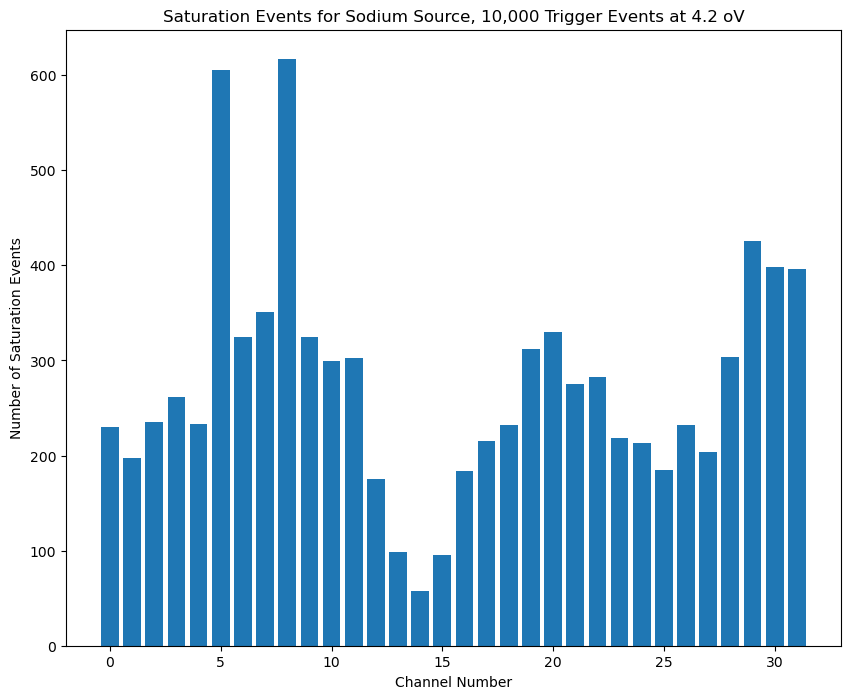

In [76]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(32), np.array(numSat_preScrew), label="Pre Screw")
#plt.bar(np.arange(32), np.array(numSat_postScrew), label="Post Screw", alpha=0.4)
plt.xlabel("Channel Number")
plt.ylabel("Number of Saturation Events")
plt.title("Saturation Events for Sodium Source, 10,000 Trigger Events at 4.2 oV")
#plt.legend()
plt.savefig("4.2oVChannelSaturation.png")

Text(0.5, 1.0, 'Saturation Events for Cesium Source, 200,000 Trigger Events at 2.2 oV')

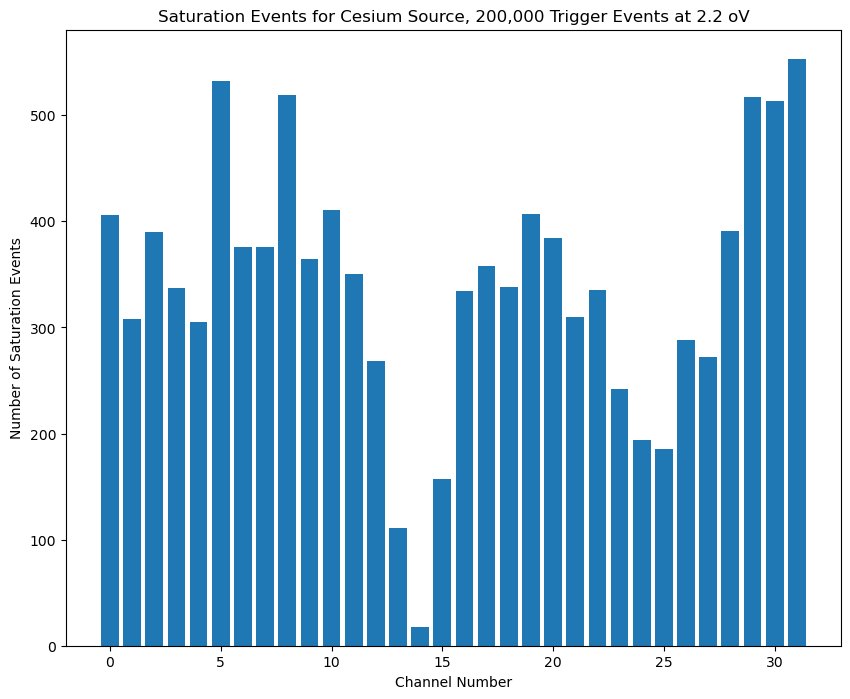

In [5]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(32), np.array(numSat_postScrew))
plt.xlabel("Channel Number")
plt.ylabel("Number of Saturation Events")
plt.title("Saturation Events for Cesium Source, 200,000 Trigger Events at 2.2 oV")

In [48]:
lowestRegisteredhighOV, numSathighOV = [], []
with h5py.File(filename_sat, "r") as f:
    for channel in range(32):
        arr = pd.DataFrame(f["sodium"][f"ch{channel}"]).to_numpy()
        lowestRegisteredhighOV.append(np.amin(arr))
        minVals = np.amin(arr, axis=1)
        print(np.mean(arr[arr<2500]))
        print(len(minVals))
        numSathighOV.append(np.count_nonzero(minVals==0.0))
        

1540.7772
10000
1588.0714
10000
1575.5646
10000
1581.8485
10000
1624.8047
10000
1477.6461
10000
1582.0598
10000
1531.3258
10000
1488.7677
10000
1557.6605
10000
1570.6895
10000
1573.4225
10000
1645.5116
10000
1788.8809
10000
1960.6055
10000
1702.0394
10000
1556.2767
10000
1560.0859
10000
1574.5798
10000
1543.4801
10000
1574.7858
10000
1618.4515
10000
1583.7045
10000
1647.3523
10000
1672.2334
10000
1677.2972
10000
1609.8893
10000
1625.0011
10000
1555.3589
10000
1496.8892
10000
1501.3944
10000
1449.502
10000


Text(0.5, 1.0, 'Saturation Events for Sodium Source, 10,000 Trigger Events at 4.2 oV')

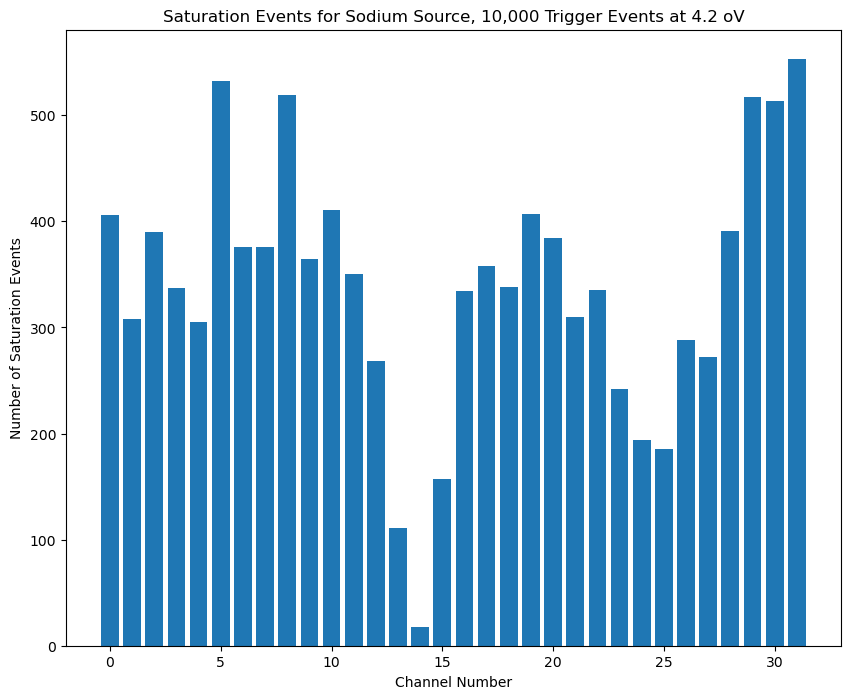

In [7]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(32), numSathighOV)
plt.xlabel("Channel Number")
plt.ylabel("Number of Saturation Events")
plt.title("Saturation Events for Sodium Source, 10,000 Trigger Events at 4.2 oV")

In [8]:
#average charge per event

In [83]:
with h5py.File(filename_sat, "r") as f:
    print("Keys: %s" % f.keys())
    df = pd.DataFrame(f["sodium"]["ch5"])
    print(df.shape)
    #df[0][0]

Keys: <KeysViewHDF5 ['sodium', 'spe']>
(10000, 1024)


In [84]:
df = df.to_numpy()
print("Lowest Registered Value in Dataframe", np.amin(df))

Lowest Registered Value in Dataframe 0.0


In [85]:
df = df.T

In [86]:
maxAmp = np.amin(df, axis=0)

In [87]:
print(np.amin(maxAmp))

0.0


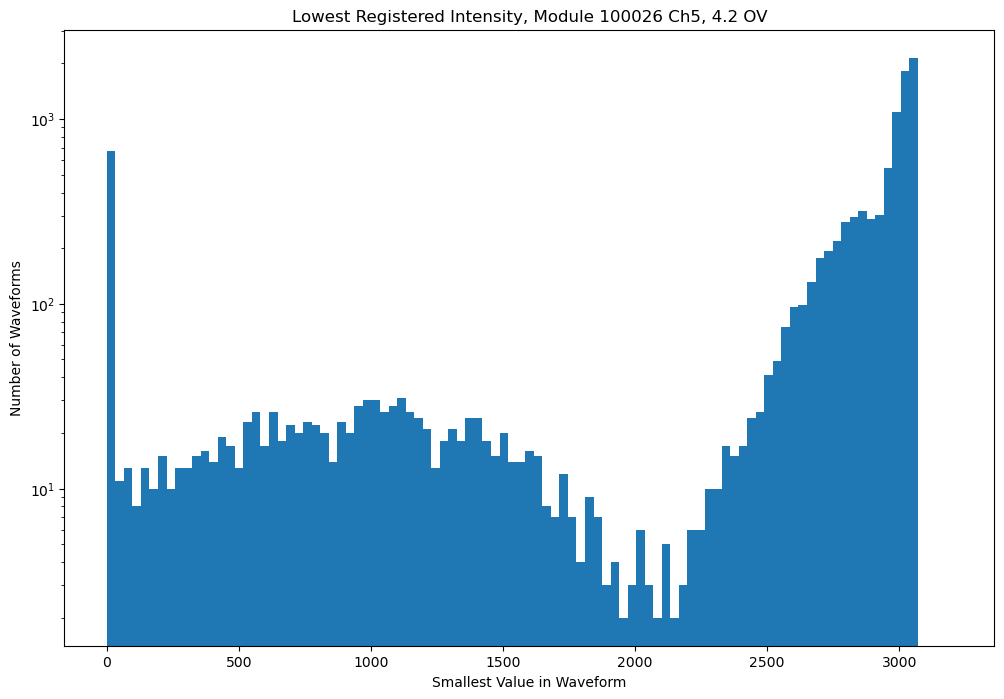

In [95]:
plt.figure(figsize=(12,8))
plt.hist(maxAmp, bins=np.linspace(0, 3200, 100), density=False)
# plt.hist(maxAmp, bins=np.linspace(0, 2800, 50), density=False)
#plt.axvline(x=2725, color='r')
plt.yscale("log")
plt.title("Lowest Registered Intensity, Module 100026 Ch5, 4.2 OV")
plt.xlabel("Smallest Value in Waveform")
plt.ylabel("Number of Waveforms")
plt.savefig("AmplitudeHist.png")

In [98]:
print(len(maxAmp[(maxAmp>1100) & (maxAmp<2000)]))

397


In [15]:
arrTrig = df.T[np.where(np.array(maxAmp)==0)[0]]
print(arrTrig.shape)

(532, 1024)


In [16]:
print(np.amin(arrTrig[0]))

0.0


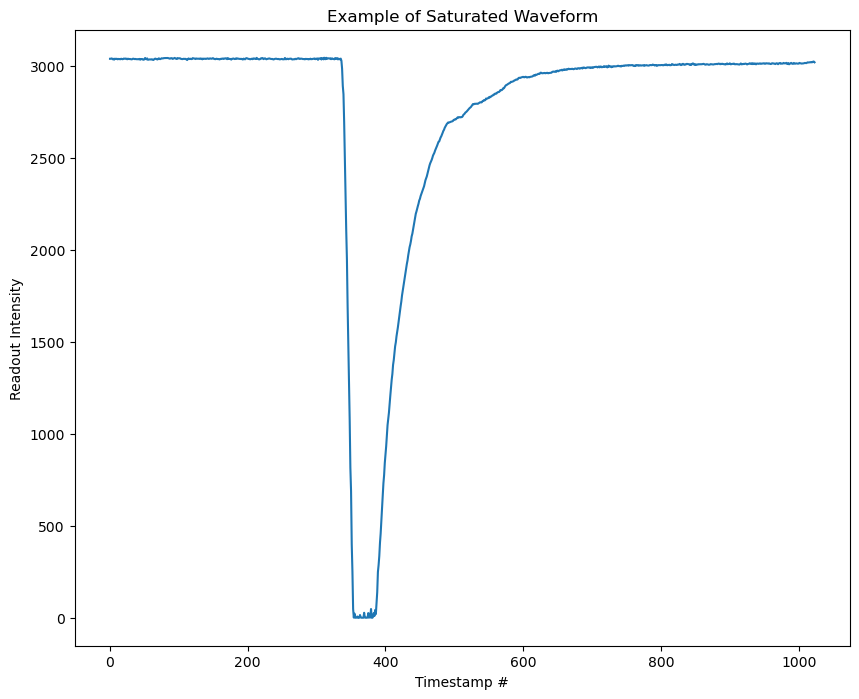

In [59]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1024), arrTrig[1])
plt.title("Example of Saturated Waveform")
plt.xlabel("Timestamp #")
plt.ylabel("Readout Intensity")
plt.savefig("SaturatedWaveform.png")

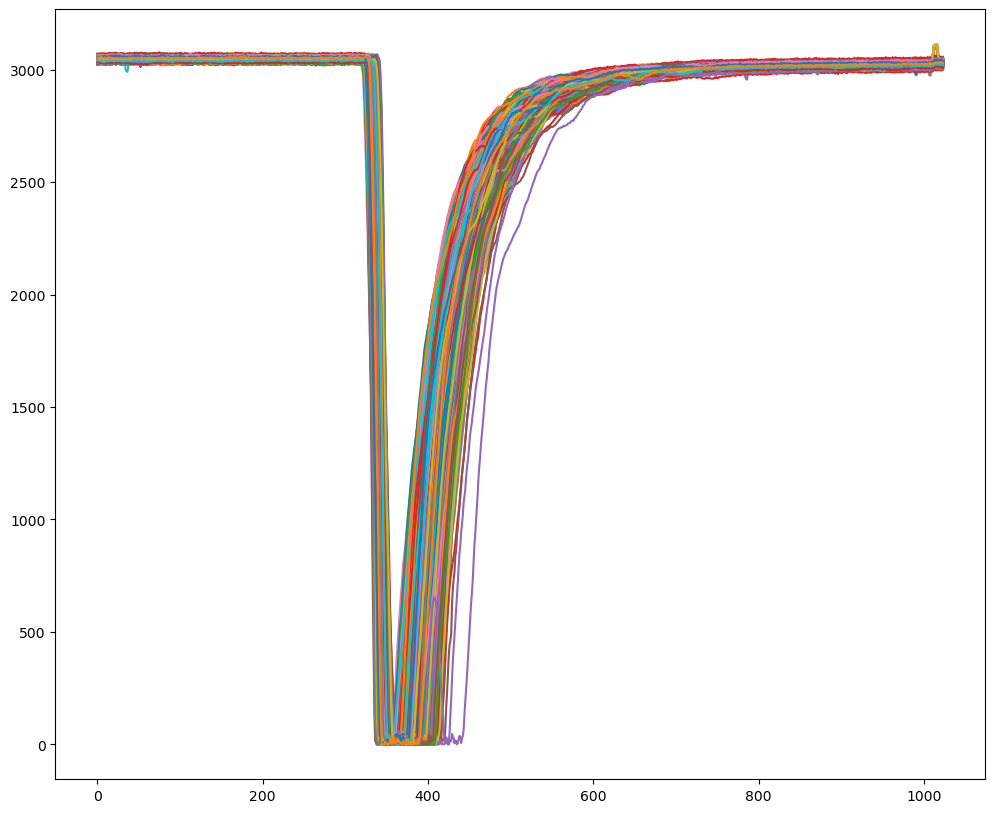

In [18]:
plt.figure(figsize=(12,10))
for i in range(len(arrTrig)):
    plt.plot(np.arange(1024), arrTrig[i])

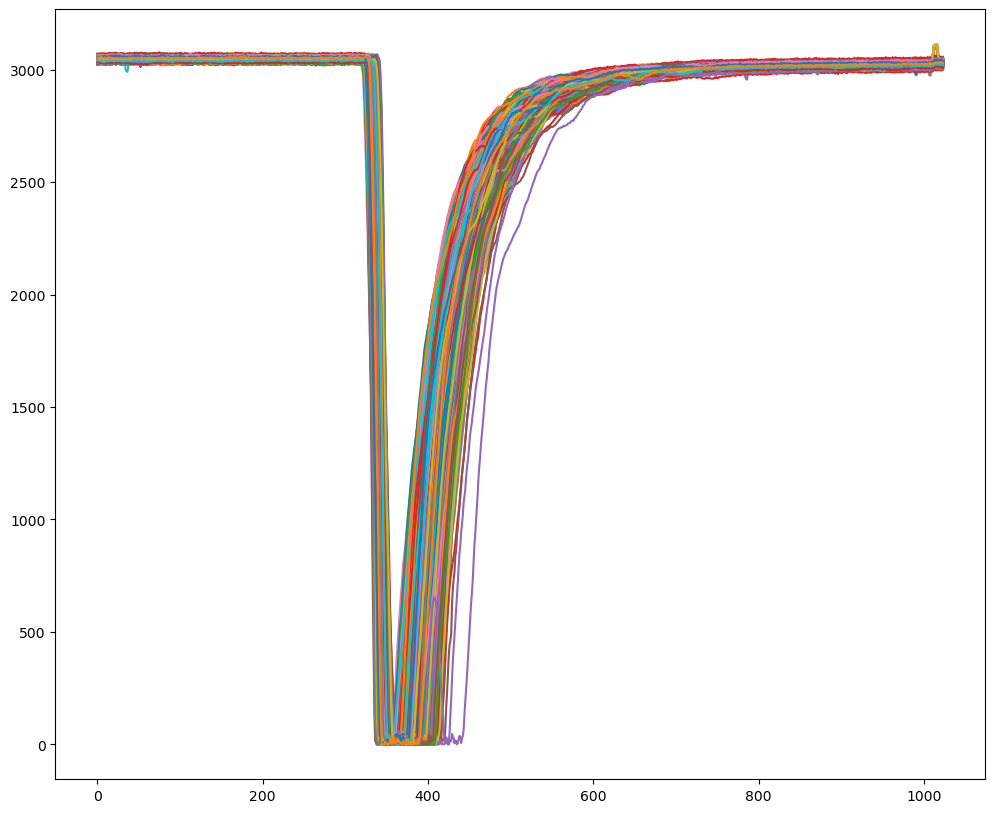

In [19]:
plt.figure(figsize=(12,10))
for i in range(len(arrTrig)):
    plt.plot(np.arange(1024), arrTrig[i])

In [20]:
import sys
sys.path.insert(0, '/home/cptlab/dt5742/python')
from analyze_waveforms import *
with h5py.File(filename_unsat, "r") as f:
    x, y = convert_data(f, "cesium", "ch5", 0, 200000)
    arr = pd.DataFrame(y).to_numpy()


KeyError: "Unable to synchronously open object (object 'cesium' doesn't exist)"

In [ ]:
plt.plot(arr[0])

In [ ]:
np.amin(arr)